# Regression Week 2: Multiple Regression (gradient descent)

Now we will use pandas along with numpy to solve for the regression weights with gradient descent.

In this notebook we will cover estimating multiple regression weights via gradient descent. You will:
* Add a constant column of 1's to a pandas DataFrame to account for the intercept
* Convert an DataFrame into a Numpy array
* Write a predict_output() function using Numpy
* Write a numpy function to compute the derivative of the regression weights with respect to a single feature
* Write gradient descent function to compute the regression weights given an initial weight vector, step size and tolerance.
* Use the gradient descent function to estimate regression weights for multiple features

# Fire up pandas

оригінал завдання https://colab.research.google.com/drive/1kDybaoty43wVuxVcRR__KlmzLqYz_hhI?authuser=1#scrollTo=N8pIGlFdt5fB

In [1]:
import pandas as pd

# Load in house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
path = 'https://raw.githubusercontent.com/OlenaKirieva/Mathematical-methods-of-machine-learning/refs/heads/main/Datasets/kc_house_data%201.csv'
sales = pd.DataFrame(pd.read_csv(path))

If we want to do any "feature engineering" like creating new features or adjusting existing ones we should do this directly using the DataFrames as seen in the practice. For this notebook, however, we will work with the existing features.

# Convert to Numpy Array

Although DataFrame offer a number of benefits to users in order to understand the details of the implementation of algorithms it's important to work with a library that allows for direct (and optimized) matrix operations. Numpy is a Python solution to work with matrices (or any multi-dimensional "array").

Recall that the predicted value given the weights and the features is just the dot product between the feature and weight vector. Similarly, if we put all of the features row-by-row in a matrix then the predicted value for *all* the observations can be computed by right multiplying the "feature matrix" by the "weight vector".

First we need to take the DataFrame of our data and convert it into a 2D numpy array (also called a matrix). We can  use Panda's .as_matrix() to convert the dataframe into a numpy matrix.

In [3]:
sales_matrix = sales.to_numpy()
type(sales_matrix)

numpy.ndarray

In [4]:
import numpy as np

Now we will write a function that will accept an DataFrame, a list of feature names (e.g. ['sqft_living', 'bedrooms']) and an target feature e.g. ('price') and will return two things:
* A numpy matrix whose columns are the desired features plus a constant column (this is how we create an 'intercept')
* A numpy array containing the values of the output

With this in mind, complete the following function (where there's an empty line you should write a line of code that does what the comment above indicates)

In [5]:
def get_numpy_data(dataframe, features, output):

    #add constant column into dataset
    dataframe['constant'] = 1

    #add constant column into features list
    features =  ['constant'] + features

    #create feature_matrix and output_array
    feature_matrix = dataframe[features].to_numpy()
    output_array = dataframe[output].to_numpy()

    return(feature_matrix, output_array)

For testing let's use the 'sqft_living' feature and a constant as our features and price as our output:

In [6]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') # the [] around 'sqft_living' makes it a list
print(example_features[0,:]) # this accesses the first row of the data the ':' indicates 'all columns'
print(example_output[0]) # and the corresponding output

[   1 1180]
221900.0


In [7]:
example_features

array([[   1, 1180],
       [   1, 2570],
       [   1,  770],
       ...,
       [   1, 1020],
       [   1, 1600],
       [   1, 1020]])

In [8]:
example_output

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [9]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,constant
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


# Predicting output given regression weights

Suppose we had the weights [1.0, 1.0] and the features [1.0, 1180.0] and we wanted to compute the predicted output 1.0\*1.0 + 1.0\*1180.0 = 1181.0 this is the dot product between these two arrays. If they're numpy arrayws we can use np.dot() to compute this:

In [10]:
my_weights = np.array([1., 1.]) # the example weights
my_features = example_features[0,] # we'll use the first data point
predicted_value = np.dot(my_features, my_weights)
print(predicted_value)

1181.0


np.dot() also works when dealing with a matrix and a vector. Recall that the predictions from all the observations is just the RIGHT (as in weights on the right) dot product between the features *matrix* and the weights *vector*. With this in mind finish the following predict_output function to compute the predictions for an entire matrix of features given the matrix and the weights:

In [11]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

If you want to test your code run the following cell:

In [12]:
test_predictions = predict_output(example_features, my_weights)
print(test_predictions[0]) # should be 1181.0
print(test_predictions[1]) # should be 2571.0

1181.0
2571.0


# Computing the Derivative

We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

(w[0]\*[CONSTANT] + w[1]\*[feature_1] + ... + w[i] \*[feature_i] + ... +  w[k]\*[feature_k] - output)^2

Where we have k features and a constant. So the derivative with respect to weight w[i] by the chain rule is:

2\*(w[0]\*[CONSTANT] + w[1]\*[feature_1] + ... + w[i] \*[feature_i] + ... +  w[k]\*[feature_k] - output)\* [feature_i]

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

2\*error\*[feature_i]

That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).

In [13]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return(derivative)

To test your feature derivartive run the following:

In [14]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([0., 0.]) # this makes all the predictions 0
test_predictions = predict_output(example_features, my_weights)
# 2 numpy arrays can be elementwise subtracted with '-':
errors = test_predictions - example_output # prediction errors in this case is just the -example_output
feature = example_features[:,0] # let's compute the derivative with respect to 'constant', the ":" indicates "all rows"
derivative = feature_derivative(errors, feature)
print(derivative)
print(-np.sum(example_output)*2) # should be the same as derivative

-23345850016.0
-23345850016.0


# Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of *increase* and therefore the negative gradient is the direction of *decrease* and we're trying to *minimize* a cost function.

The amount by which we move in the negative gradient *direction*  is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.

With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria

In [15]:
from math import sqrt

In [16]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    while not converged:

        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)

        # compute the errors
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares

        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight

            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])

            # add the squared value of the derivative to the gradient sum of squares (for assessing convergence)
            gradient_sum_squares += derivative**2

            # subtract the step size times the derivative from the current weight
            weights[i] -= step_size * derivative

        # compute the square-root of the gradient sum of squares to get the gradient magnitude:
        gradient_magnitude = np.sqrt(gradient_sum_squares)

        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

A few things to note before we run the gradient descent. Since the gradient is a sum over all the data points and involves a product of an error and a feature the gradient itself will be very large since the features are large (squarefeet) and the output is large (prices). So while you might expect "tolerance" to be small, small is only relative to the size of the features.

For similar reasons the step size will be much smaller than you might expect but this is because the gradient has such large values.

# Running the Gradient Descent as Simple Regression

First let's split the data into training and test data.

In [17]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(sales, test_size = 0.8,random_state=0)

Although the gradient descent is designed for multiple regression since the constant is now a feature we can use the gradient descent function to estimat the parameters in the simple regression on squarefeet. The folowing cell sets up the feature_matrix, output, initial weights and step size for the first model:

In [18]:
# let's test out the gradient descent
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

Next run your gradient descent with the above parameters.

In [19]:
(intercept, slope) = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

intercept, slope

(np.float64(-46999.880188463605), np.float64(280.5100501255281))

How do your weights compare to those achieved in week 1 (don't expect them to be exactly the same)?

**Quiz Question: What is the value of the weight for sqft_living -- the second element of ‘simple_weights’ (rounded to 1 decimal place)?**

In [20]:
print(slope.round(1))

280.5


Use your newly estimated weights and your predict_output() function to compute the predictions on all the TEST data (you will need to create a numpy array of the test feature_matrix and test output first:

In [21]:
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

Now compute your predictions using test_simple_feature_matrix and your weights from above.

In [22]:
simple_weights = np.array([intercept, slope])
test_predictions = predict_output(test_simple_feature_matrix, simple_weights)
# prediction_test = intercept + slope * test_simple_feature_matrix[:, 1]
# prediction_test = np.dot(test_simple_feature_matrix, np.array([intercept, slope]))

**Quiz Question: What is the predicted price for the 1st house in the TEST data set for model 1 (round to nearest dollar)?**

In [23]:
print(test_predictions[0].round(0))

354129.0


Now that you have the predictions on test data, compute the RSS on the test data set. Save this value for comparison later. Recall that RSS is the sum of the squared errors (difference between prediction and output).

In [24]:
residuals = test_output - test_predictions
RSS_test = (residuals ** 2).sum()

print("RSS on test data:", RSS_test)

RSS on test data: 1203844519440140.0


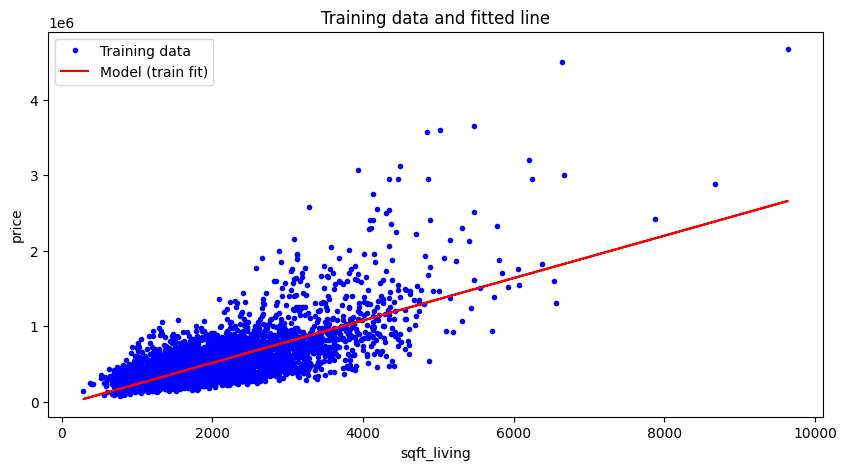

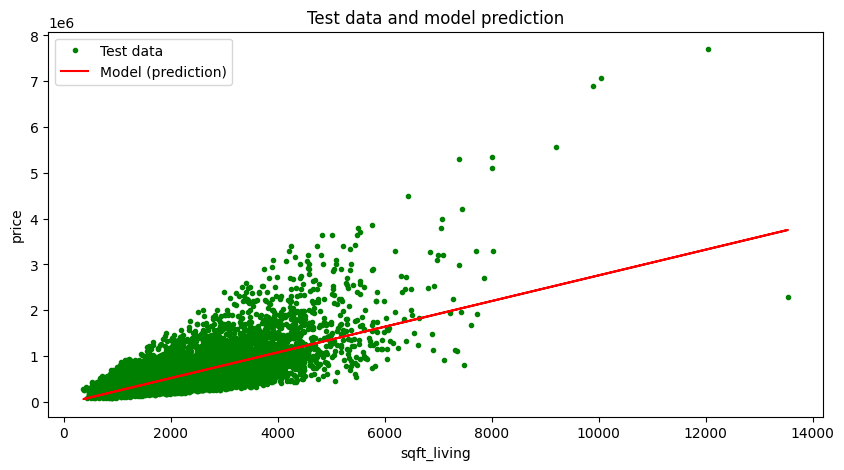

In [25]:
import matplotlib.pyplot as plt

train_predictions = predict_output(simple_feature_matrix, simple_weights)

# Графік для тренувальних даних
plt.figure(figsize=(10,5))
plt.plot(simple_feature_matrix[:,1], output, 'b.', label='Training data')  # реальні дані
plt.plot(simple_feature_matrix[:,1], train_predictions, 'r-', label='Model (train fit)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Training data and fitted line')
plt.legend()
plt.show()

# Графік для тестових даних
plt.figure(figsize=(10,5))
plt.plot(test_simple_feature_matrix[:,1], test_output, 'g.', label='Test data')  # реальні тестові дані
plt.plot(test_simple_feature_matrix[:,1], test_predictions, 'r-', label='Model (prediction)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Test data and model prediction')
plt.legend()
plt.show()


# Running a multiple regression

Now we will use more than one actual feature. Use the following code to produce the weights for a second model with the following parameters:

In [26]:
model_features_mr = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors.
my_output = 'price'
(feature_matrix_mr, output_mr) = get_numpy_data(train_data, model_features_mr, my_output)
initial_weights_mr = np.array([-100000., 1., 1.])
step_size_mr = 4e-12
tolerance_mr = 1e9

Use the above parameters to estimate the model weights. Record these values for your quiz.

In [27]:
weights = regression_gradient_descent(feature_matrix_mr, output_mr, initial_weights_mr, step_size_mr, tolerance_mr)

Use your newly estimated weights and the predict_output function to compute the predictions on the TEST data. Don't forget to create a numpy array for these features from the test set first!

In [28]:
(test_feature_matrix_mr, test_output) = get_numpy_data(test_data, model_features_mr, my_output)
test_predictions_mr = predict_output(test_feature_matrix_mr, weights)

**Quiz Question: What is the predicted price for the 1st house in the TEST data set for model 2 (round to nearest dollar)?**

In [29]:
print(test_predictions_mr[0].round(0))

342008.0


What is the actual price for the 1st house in the test data set?

In [30]:
print(test_output[0])

297000.0


**Quiz Question: Which estimate was closer to the true price for the 1st house on the TEST data set, model 1 or model 2?**

In [31]:
print('actual price       ', test_output[0])
print('TEST data model 1: ', test_predictions[0].round(0))
print('TEST data model 2: ', test_predictions_mr[0].round(0))

actual price        297000.0
TEST data model 1:  354129.0
TEST data model 2:  342008.0


Now use your predictions and the output to compute the RSS for model 2 on TEST data.

In [32]:
residuals_mr = test_output - test_predictions_mr
RSS_test_mr = (residuals_mr ** 2).sum()

print("RSS on test data:", RSS_test_mr)

RSS on test data: 1186047263989195.2


**Quiz Question: Which model (1 or 2) has lowest RSS on all of the TEST data? **

In [33]:
print("RSS on test data simple model:   ", RSS_test)
print("RSS on test data multiple model: ", RSS_test_mr)

RSS on test data simple model:    1203844519440140.0
RSS on test data multiple model:  1186047263989195.2


# Multiple regression using the top 5 features selected from the correlation matrix.

In [34]:
model_features_mr5 = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
my_output = 'price'
(feature_matrix_mr5, output_mr5) = get_numpy_data(train_data, model_features_mr5, my_output)
initial_weights_mr5 = np.array([-100000., 1., 1., 1., 1., 1])
step_size_mr5 = 4e-12
tolerance_mr5 = 1e9

In [35]:
weights5 = regression_gradient_descent(feature_matrix_mr5, output_mr5, initial_weights_mr5, step_size_mr5, tolerance_mr5)

In [36]:
(test_feature_matrix_mr5, test_output) = get_numpy_data(test_data, model_features_mr5, my_output)
test_predictions_mr5 = predict_output(test_feature_matrix_mr5, weights5)

In [37]:
residuals_mr5 = test_output - test_predictions_mr5
RSS_test_mr5 = (residuals_mr5 ** 2).sum()

print("RSS on test data:", RSS_test_mr5)

RSS on test data: 1182420660297198.8


In [38]:
print('actual price       ', test_output[0])
print('TEST data model 1: ', test_predictions[0].round(0))
print('TEST data model 2: ', test_predictions_mr[0].round(0))
print('TEST data model 5: ', test_predictions_mr5[0].round(0))

actual price        297000.0
TEST data model 1:  354129.0
TEST data model 2:  342008.0
TEST data model 5:  335159.0


**Висновки:**

Зі збільшенням кількості ознак, значення RSS зменшується. Оскільки RSS - це сума квадратів усіх відхилень передбачень від реального значення цільової змінної, то більш інформативними були б метрики RMSE або R2.


Додавання ознак поступово покращує точність моделей.

Для кращого прогнозування варто включати більше значущих змінних.
